# 1.

테스트 데이터 세트로 정확도 97%가 넘는 MNIST데이터세트 분류 모델을 구현해보자.
   * Hint : `KNeighborsClassifiers`가 이 문제에 대해서 잘 작동할 것이다. 우리는 좋은 하이퍼 파라미터 값은 찾기만 하면된다. (`weight`와 `n_neighbors` 하이퍼 파라미터에 대해서 그리드 탐색을 해보자.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#MNIST 데이터 세트 다운로드
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# 데이터와 레이블 데이터 설정 및 학습데이터 테스트 데이터 분할
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# KNN 모델 정의
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

**주의**: 아래의 학습 코드는 학습시간이 정말 너무 오래 걸리므로 실행전 주의해야한다.

In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] weights=uniform, n_neighbors=3 ..................................
[CV]  weights=uniform, n_neighbors=3, score=0.9717617659308622, total= 9.0min
[CV] weights=uniform, n_neighbors=3 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 44.5min remaining:    0.0s


[CV]  weights=uniform, n_neighbors=3, score=0.9706715547408765, total= 9.0min
[CV] weights=uniform, n_neighbors=3 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 89.1min remaining:    0.0s


[CV]  weights=uniform, n_neighbors=3, score=0.9689166666666666, total= 9.0min
[CV] weights=uniform, n_neighbors=3 ..................................
[CV]  weights=uniform, n_neighbors=3, score=0.968575477202634, total= 9.0min
[CV] weights=uniform, n_neighbors=3 ..................................
[CV]  weights=uniform, n_neighbors=3, score=0.9704068022674225, total= 9.1min
[CV] weights=distance, n_neighbors=3 .................................
[CV]  weights=distance, n_neighbors=3, score=0.9723448563098709, total= 9.1min
[CV] weights=distance, n_neighbors=3 .................................
[CV]  weights=distance, n_neighbors=3, score=0.9716713881019831, total= 9.1min
[CV] weights=distance, n_neighbors=3 .................................
[CV]  weights=distance, n_neighbors=3, score=0.9700833333333333, total= 9.2min
[CV] weights=distance, n_neighbors=3 .................................
[CV]  weights=distance, n_neighbors=3, score=0.9700758522964075, total= 9.1min
[CV] weights=distance, n_

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 1345.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [3]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [4]:
grid_search.best_score_

0.97161666666666668

In [5]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.97140000000000004

# 2.

픽셀단위로 MNIST 데이터 세트를 어느 방향(아래, 위, 왼쪽, 오른쪽)으로든 움직이게 하는 함수를 작성해보자. 그리고 학습 데이터 세트에있는 각각의 이미지에 대해서 네 방향으로 움직인 이미지를 만들어보고 그 이미지들은 학습 데이터 세트에 추가해보자. 마지막으로 이 확장한 학습 데이터 세트를 가지고 우리의 최고의 모델을 학습시켜보고 테스트 데이터 세트로 그 정확도를 측정해보자. 우리가 만든 모델이 심지어 잘 수행되는지 조사해보라. 이러한 인공적으로 학습 데이터를 증가시키는 것을 `Data argumentation` 혹은 `training set expansion`이라고 한다.

In [6]:
from scipy.ndimage.interpolation import shift

In [7]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

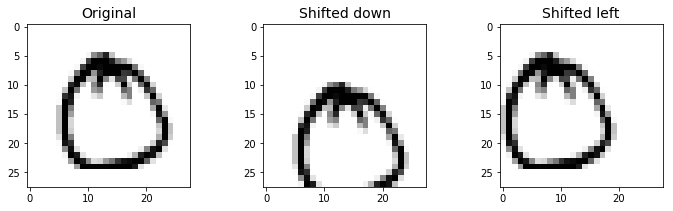

In [8]:
import matplotlib.pyplot as plt

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [9]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [10]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [11]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [12]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [13]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.97629999999999995

데이터를 뿔려주었더니 정확도가 약 0.5%정도 상승했다. :)

# 3.

타이타닉(*titanic*) 데이터 세트로 한번 도전해보자. [Kaggle](https://www.kaggle.com/c/titanic)에서 처음 시작해보는 것이 좋다.

목표는 승객의 나이, 성별, 승객이 승선한 객실클래스 등등 같은 속성값들에 기반해서 승객이 살아남을 수 있는지 없는지를 예측하는 것이다.

데이터를 불러오자!

In [14]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [15]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [18]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

데이터는 이미 학습 데이터랑 훈련 데이터로 나뉘어져 있다. 하지만, 테스트 데이터는 레이블을 포함하고 있지않다. 우리의 목표는 학습데이터를 사용해서 최고의 모델을 만든뒤에, 테스트 데이터에 대해서 예측값을 얻는 것이다. 그 결과를 Kaggle에 올려서 최종 점수를 보는 것이다.

학습 데이터 세트에서 상위 몇가지 행들을 한번 둘러보자.

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


속성값들은 다음과 같은 뜻을 가지고 있다.

* **Survived**: 이것이 타겟 값으로, 0은 승객이 살아남지 못했다는 것을 의미하고, 반면에 1은 승객이 생존했다는 것을 의미한다.
* **Pclass**: 객실클래스.
* **Name**, **Sex**, **Age**: 설명이 필요 없다.
* **SibSp**: 타이타닉에 탑승한 승객중 얼마나 많은 형제자매나 배우자가 탑승하였는지를 말한다.
* **Parch**: 타이타닉에 탑승한 승객중 얼마나 많은 아이들과 부모가 있엇는지를 나타낸다.
* **Ticket**: 티켓 번호
* **Fare**: 지불한 돈 (단위 : 파운드)
* **Cabin**: 승객의 객실 번호
* **Embarked**: 타이타닉에 승성한 승객의 위치

데이터가 얼마나 손실되는지 좀 더 살펴보자.

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Age**, **Cabin**와 **Embarked** 속성값중에서 어떤 것들은 `null`(891개 이하정도가 값을 가지고 있음)이며, 특히 **Cabin**은 77%정도가 `null`이다. 지금은 **Cabin** 속성값은 무시하고 다른 속성값들에 대해서 집중해보자. **Age** 속성값은 19%정도가 `null`값이라 이 속성들을 어떻게 해야할지 정해야한다. null을 평균 나이로 대체하는 것이 어느정도 괜찮아보인다.

**Name**과 **Ticket** 속성값은 값을 가지고는 있지만 학습 모델이 받아들일 수 있도록 하는 유용한 숫자값들로 바꿔줄 수 있을 것이다. 하지만 지금은 무시를 하자.

숫자로 된 속성값들은 무엇이 있는지 살펴보자

In [21]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 헉, 오직 38%정도만이 생존(**Survived**)했다. :(  그래도 40%정도에 가까워, 정확도는 우리 모델을 평가하는데 합리적인 측정법이 될 것이다.
* **Fare**의 평균은 £32.20(파운드)이며, 이는 생각보다 비싸지 않다. (그래도 과거의 돈은 지금보다 더 비싼 값어치를 가지고 있었을 것이다.)
* **Age** 평균은 30세 이전 정도이다.

실제로 타겟값들이 0혹은 1인지 확인해보자.

In [22]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

이제 모든 카테고리로 된 속성값들을 빠르게 훑어보자.

In [23]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Embarked** 속성값은 승객이 어디에 승선하였는지를 나타내준다. `C=Cherbourg`, `Q=Queenstown`, `S=Southampton`

`CategoricalEncoder`클래스는 우리가 카테고리로 된 값들을 one-hot 벡터로 변환하게 해줄 것이다. one-hot encoding은 곧 Scikit-learn에 추가될 것이다. 그동안에는 아래의 코드를 사용하자.(Pull Request #9151에 있는 코드를 복사한 것임).

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

이제 전처리 파이프 라인을 만들어보자. 이전 Chapter에서 사용했던 `DataFrame`에서 특정 속성값들을 골라오기 위해 `DataframeSelector`를 다시 사용할 것이다.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

숫자로 된 속성값들에 대한 파이프라인도 구현해보자

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
    ])

In [29]:
num_pipeline.fit_transform(train_data)

array([[ 22.    ,   1.    ,   0.    ,   7.25  ],
       [ 38.    ,   1.    ,   0.    ,  71.2833],
       [ 26.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [ 28.    ,   1.    ,   2.    ,  23.45  ],
       [ 26.    ,   0.    ,   0.    ,  30.    ],
       [ 32.    ,   0.    ,   0.    ,   7.75  ]])

string 카테고리 열을 전가할(imputer) 필요가 잇다. (평범한 `Imputer`는 이 기능을 제공하지 않는다)

In [30]:
# stackoverflow.com/questions/25239958 에 영감을 받아 구현한 코드
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X],
                                       index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)

이제 카테고리 속성값도 처리해주는 파이프라인도 구현할 수 있다.

In [31]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", CategoricalEncoder(encoding='onehot-dense')),
    ])

In [32]:
cat_pipeline.fit_transform(train_data)

array([[ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  1.,  0.]])

마지막으로, 숫자로된 파이프라인과 카테고리로 된 파이프라인을 합쳐보자.

In [33]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

멋지다! 이제 원래의 데이터를 가져와서 우리가 원하는 그 어떤 기계학습 알고리즘에 입력할 수 있는 숫자로 구성된 입력값을 출력해주는 훌륭한 전처리 파이프라인을 구현했다.

In [34]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 22.,   1.,   0., ...,   0.,   0.,   1.],
       [ 38.,   1.,   0., ...,   1.,   0.,   0.],
       [ 26.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 28.,   1.,   2., ...,   0.,   0.,   1.],
       [ 26.,   0.,   0., ...,   1.,   0.,   0.],
       [ 32.,   0.,   0., ...,   0.,   1.,   0.]])

레이블 값을 가져오는 것도 잊지말자.

In [35]:
y_train = train_data["Survived"]

이제 우리는 분류모델을 학습시킬 준비가 되었다. `SVC`를 활용해보자.

In [36]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

훌륭하다, 모델이 학습되었다. 이제 테스트 데이터 세트에 대해서 예측값을 만들어보자.

In [37]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

그리고 이제 우리는 이런 예측 결과를 CSV파일로 만들고(Kaggle에 제출해야 하는 형식임), 이를 Kaggle에 올려본 뒤에 최고의 결과치를 가질 수 있도록 기도하면된다. 하지만 우리가 기도하는 것보다 더 좋은걸 해볼 수 있다. 우리모델이 얼마나 좋은지 평가하는데 교차검증법을 사용하려는 생각을 하지 못했을까?

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
scores.mean()

0.73652508228350921

좋아, 73%이상의 정확도를 가지며 분명이 막 찍는 것보다는 좋지만, 좋은 결과값은 아니다. Kaggle에 있는 타이타닉 데이터 공모전에 대한 [leaderboard](https://www.kaggle.com/c/titanic/leaderboard)를 보면, 상위 10%에 있는 캐글러(Kaggler)의 것은 80%이상 올라간다. 일부는 100%를 찍으며, [list of victims](https://www.encyclopedia-titanica.org/titanic-victims/)을 찾아보면 아보다 조금 기계학습이 그들의 수행도가 더

그래서 이제 정확도가 80%에 가까워지도록 모델을 만들어보자.

Okay, over 73% accuracy, clearly better than random chance, but it's not a great score. Looking at the [leaderboard](https://www.kaggle.com/c/titanic/leaderboard) for the Titanic competition on Kaggle, you can see that you need to reach above 80% accuracy to be within the top 10% Kagglers. Some reached 100%, but since you can easily find the [list of victims](https://www.encyclopedia-titanica.org/titanic-victims/) of the Titanic, it seems likely that there was little Machine Learning involved in their performance! ;-) So let's try to build a model that reaches 80% accuracy.

`RandomForestClassifier`로 시도해보자

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
scores.mean()

0.8115690614005221

확실히 더 좋다!

결과를 좀 더 향상시키기 위해서는
* 다른 모델과도 비교해보고 교차 검증법과 그리드 서치를 사용하여 하이퍼 파라미터를 조율해보자.
* 좀 더 특징값들에 대해서 다루어보자. 예를들면,
  * **SibSp**와 **Parch**를 그들의 합으로 바꾸어보자
  * **Survived** 속성값들과 잘 연관된 것들이 이름에 있는지 확인해보자 (이름에 "Countess"(여자백작)가 포함되어 있다면 좀 더 생존할 가능성이 있다.)
* 숫자 속성값들을 카테고리 속성값으로 변환해보자. 예를들어, 나이 세대마다 생존 확률이 매우 다르다. (아래를 참고하라) 그래서 **age bucket**이라는 카테고리를 만들고 **age**속성 대신에 사용해보자. 비슷한 방법으로 혼자 여행한 사람들에 대한 특별한 카테고리를 만들어보는 것도 괜찮은 방법일 수도있다. (아래를 참고하자)

In [40]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [41]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


# 4.

4. 스팸 분류 모델을 구현해보자 **(도전과제)**
   * [Apache SpamAssassin's public datasets](https://spamassassin.apache.org/old/publiccorpus/)에서 스팸과 스팸이 아닌 메일에 대한 예시를 다운로드 하자.
   * 데이터셋의 압축을 풀고 데이터 형식에 대해서 익숙해지자
   * 특징 벡터로 각각의 이메일을 변환하는 데이터 사전준비 파이프라인을 작성해보자. 전처리 파이프라인은 이메일을 각각의 가능한 단어들의 부재와 존재를 나타내주는 (희소) 벡터로 변환해야한다. 예로, 만약 모든 메일이 네 가지 단어("Hello", "how", "are", "you")를 가지고 있다면, "Hello you Hello Hello you"라는 이메일은 [1,0,0,1]이라는 벡터로 변환되어야한다.(벡터의 의미는 hello와 you가 존재하고, how와 are 이 없기 때문에 1,0,0,1로 표현된 것이다.) 아니면 나온 단어 수를 세어서 벡터 값으로 활용할 수 있을 것이다. 예로 위의 경우를 표현한다면 [3,0,0,2]로 표현할 수 있을 것이다.
   * 다른 분류 모델을 시도해보고, recall과 precision이 높은 좋은 스팸 메일 분류 모델을 만들어보자.

먼저 데이터를 불러와보자.

In [42]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [43]:
fetch_spam_data()

그리고 모든 이메일들을 불러와보자.

In [44]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [45]:
len(ham_filenames)

2500

In [46]:
len(spam_filenames)

500

이메일들을 파싱(Parsing)하기 위해 Python의 `email`모듈을 사용할 수 있다.

In [47]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [48]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

데이터가 어떻게 생겼는지 감을 얻기 위해 스팸이 아닌 메일과 스팸인 메일을 살펴보자.

In [49]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [50]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


몇몇 이메일들은 이미지나 첨부가 달려있는 메일도 있다. 우리가 가진 구조의 다양한 종류들을 살펴보자

In [51]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [52]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [53]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(text/plain, application/x-java-applet)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1)]

In [54]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1)]

스팸이 아닌 메일이 좀 더 종종 평서문으로 되어있는 반면에 스팸메일은 HTML이 꽤 많이 실려있다. 더 나아가 스팸이 아닌 메일은 PGP를 사용하지만, 반면에 스팸메일은 그렇지 못하다. 

이제 이메일의 헤더(header)를 살펴보자

In [55]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

보내는 사람의 이메일 주소같은 유용한 정보가 많을 것이다. 하지만 우리는 `Subject`라는 헤더에 집중해볼 것이다.

In [56]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

데이터에 대해서 더 살펴보기전에 학습 데이터와 테스트 데이터로 나누는 것을 잊지말자.

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

좋다, 전처리 함수를 작성해보자. 먼저 HTML을 평서문으로 변환해주는 함수가 필요할 것이다. 아마도 최고의 방법은 [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)라이브러리를 사용하는 것이지만, 이 프로젝트의 의존성을 더이상 추가하고 싶지 않으므로, 빠르지만 더러운 솔루션을 사용할 것이다. 다음의 함수는 먼저 `<head>` 섹션을 삭제해주고 모든 `<a>`태그를 하이퍼링크로 변환헤주고, 일반 평서문들을 제외한 모든 HTML 태그를 삭제한다. 읽기 좋도록, 한줄에 여러개의 명령어를 추가하고, 마지막엔 (`&gt;`나 `&nbsp;` 같은) HTML 내용을 디코딩(unescape)해준다.

In [58]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I)
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I)
    text = re.sub('<.*?>', '', text, flags=re.M | re.S)
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)
    return unescape(text)

작동하는지 보자. HTML 스팸 메일이다.

In [59]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<HTML><HEAD><TITLE></TITLE><META http-equiv="Content-Type" content="text/html; charset=windows-1252"><STYLE>A:link {TEX-DECORATION: none}A:active {TEXT-DECORATION: none}A:visited {TEXT-DECORATION: none}A:hover {COLOR: #0033ff; TEXT-DECORATION: underline}</STYLE><META content="MSHTML 6.00.2713.1100" name="GENERATOR"></HEAD>
<BODY text="#000000" vLink="#0033ff" link="#0033ff" bgColor="#CCCC99"><TABLE borderColor="#660000" cellSpacing="0" cellPadding="0" border="0" width="100%"><TR><TD bgColor="#CCCC99" valign="top" colspan="2" height="27">
<font size="6" face="Arial, Helvetica, sans-serif" color="#660000">
<b>OTC</b></font></TD></TR><TR><TD height="2" bgcolor="#6a694f">
<font size="5" face="Times New Roman, Times, serif" color="#FFFFFF">
<b>&nbsp;Newsletter</b></font></TD><TD height="2" bgcolor="#6a694f"><div align="right"><font color="#FFFFFF">
<b>Discover Tomorrow's Winners&nbsp;</b></font></div></TD></TR><TR><TD height="25" colspan="2" bgcolor="#CCCC99"><table width="100%" border="0" 

그리고 이것은 결과로 나온 평서문 형식이다.

In [60]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Watch for analyst "Strong Buy Recommendations" and several advisory newsletters picking CBYI.  CBYI has filed to be traded on the OTCBB, share prices historically INCREASE when companies get listed on this larger trading exchange. CBYI is trading around 25 cents and should skyrocket to $2.66 - $3.25 a share in the near future.
Put CBYI on your watch list, acquire a position TODAY.
REASONS TO INVEST IN CBYI
A profitable company and is on track to beat ALL earnings estimates!
One of the FASTEST growing distributors in environmental & safety equipment instruments.
Excellent management team, several EXCLUSIVE contracts.  IMPRESSIVE client list including the U.S. Air Force, Anheuser-Busch, Chevron Refining and Mitsubishi Heavy Industries, GE-Energy & Environmental Research.
RAPIDLY GROWING INDUSTRY
Industry revenues exceed $900 million, estimates indicate that there could be as much as $25 billi

좋다! 이제 이메일의 형식이 무엇이든 입력으로 받아 평서문으로 반환해주는 함수를 작성해보자.

In [61]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [62]:
print(email_to_text(sample_html_spam)[:100], "...")


OTC
 Newsletter
Discover Tomorrow's Winners 
For Immediate Release
Cal-Bay (Stock Symbol: CBYI)
Wat ...


dlwp wnfrlfmf cuqhwk
Let's throw in some stemming! For this to work, you need to install the Natural Language Toolkit ([NLTK](http://www.nltk.org/)). It's as simple as running the following command (don't forget to activate your virtualenv first; if you don't have one, you will likely need administrator rights, or use the `--user` option):

`$ pip install nltk`

In [63]:
try:
    import nltk

    stemmer = nltk.PorterStemmer()
    for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
        print(word, "=>", stemmer.stem(word))
except ImportError:
    print("Error: stemming requires the NLTK module.")
    stemmer = None

Error: stemming requires the NLTK module.


URL로 이루어진 곳은 "URL"이라는 단어로 바꾸어줄 필요가 있다. [urlextract](https://github.com/lipoja/URLExtract) 라이브러리를 사용해볼 것이다. (가상환경을 켜놓는 것을 잊지말자) 아래의 명령어로 해당 모듈을 설치할 수 있다.

`$ pip install urlextract`

In [64]:
try:
    import urlextract # may require an Internet connection to download root domain names
    
    url_extractor = urlextract.URLExtract()
    print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))
except ImportError:
    print("Error: replacing URLs requires the urlextract module.")
    url_extractor = None

Error: replacing URLs requires the urlextract module.


이제 이메일들을 단어의 개수를 세주는 곳에 넣어주기 위한 변환함수에 모두 함깨 넣어줄 수 있게 되었다. 파이썬의 `split()` 함수를 사용해 문장을 단어로 나누어야하며 이는 단어 경계를 스페이스로 사용한다. 이는 수많은 언어들에게 잘 작동하지만 모든 언어에 부합하는 것은 아니다. 중국어나 일본어 스크립트는 일반적으로 단어 사이제 띄어쓰기를 하지 않으며, 베트남어는 종종 음절 사이에 띄어쓰기를 하기도 한다. 이번 예시에서는 괜찮다. 영어로 이루어져 있으니까.

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

몇가지 이메일에 대해서 이 변환함수를 실험해보자.

In [66]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([ Counter({'yawn': 1, 'wrote': 1, 'murcko': 1, 'chuck': 1, 'stuff': 1, 'r': 1}),
       Counter({'the': 11, 'of': 9, 'and': 8, 'by': 3, 'to': 3, 'all': 3, 'christianity': 3, 'one': 2, 'has': 2, 'have': 2, 'half': 2, 'jefferson': 2, 'jesus': 2, 'been': 2, 'i': 2, 'on': 2, 'burnt': 1, 'worbois': 1, 'a': 1, 'that': 1, 'are': 1, 'teachings': 1, 'pfp': 1, 'our': 1, 'rogueries': 1, 'innocent': 1, 'remsburg': 1, 'known': 1, 'paul': 1, 'effect': 1, 'www': 1, 'fools': 1, 'not': 1, 'six': 1, 'what': 1, 'perpetrated': 1, 'thomas': 1, 'children': 1, 'man': 1, 'tortured': 1, 'fables': 1, 'earth': 1, 'http': 1, 'upon': 1, 'in': 1, 'william': 1, 'redeeming': 1, 'do': 1, 'examined': 1, 'introduction': 1, 'over': 1, 'word': 1, 'perverted': 1, 'corrupter': 1, 'ever': 1, 'women': 1, 'americans': 1, 'roguery': 1, 'shone': 1, 'short': 1, 'interesting': 1, 'dupes': 1, 'coercion': 1, 'feature': 1, 'world': 1, 'imprisoned': 1, 'e': 1, 'html': 1, 'system': 1, 'some': 1, 'quotes': 1, 'millions': 1, 'impor

올바르게 된 것 같다!

이제 우리는 단어의 수를 셀 것이다. 그리고 이를 벡터로 변환해줄 필요가 있다. 이를 위해 `fit()` 함수가 어휘를 구현하고 `transform()` 함수가 어휘를 사용하여 단어 수를 벡터로 변환하도록하는 또 다른 변환함수를 구축 할 것이다. 결과는 희소행렬로 출력이 될 것이다.

In [67]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.most_common_ = most_common
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [68]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [69]:
X_few_vectors.toarray()

array([[  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [110,   9,  11,   8,   3,   0,   1,   3,   1,   0,   3],
       [ 94,   1,   0,   2,   3,   5,   4,   1,   3,   4,   0]], dtype=int64)

In [70]:
vocab_transformer.vocabulary_

{'NUMBER': 5,
 'all': 7,
 'and': 3,
 'by': 10,
 'com': 8,
 'http': 6,
 'of': 1,
 'the': 2,
 'to': 4,
 'yahoo': 9}

이제 스팸메일 분류모델을 학습시킬 준비가 되었다 전체 데이터를 변환해보자.

In [71]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ..................................... , score=0.98, total=   0.1s
[CV]  ................................................................
[CV] ................................... , score=0.9825, total=   0.0s
[CV]  ................................................................
[CV] .................................. , score=0.99125, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.98458333333333325

98.4%정도가 넘는다. 처음치고는 나쁘지않다! :) 하지만 우리는 쉬운 데이터 세트를 사용했다는 것을 기억하자. 좀 더 어려운 데이터로 시도해볼 수 있지만 결과가 그렇게 놀랄 정도가 되지는 못할 것이다. 좀 더 다양한 모델들을 시도하고, 최고의 모델을 골라 교차 검증법을 통해 하이퍼 파라미터를 조율하고...

그림이 어느정도 나오게되면 일단 잠시 멈추고, 테스트 데이터 세트에 대해서 precision/recall를 출력해보자.

In [73]:
from sklearn.metrics import precision_score, recall_score

X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf = LogisticRegression()
log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)))

Precision: 1.00%
Recall: 0.98%
